In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import model_selection,naive_bayes,svm,metrics,feature_extraction

In [2]:
data=pd.read_csv(r"C:\Users\nikit\OneDrive\Desktop\Attrition.csv")

In [3]:
data

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,4409,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [4]:
data.shape

(4410, 29)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [6]:
data.describe()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,1273.201673,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [7]:
data.dtypes

EmployeeID                   int64
Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating   

In [8]:
data.duplicated().sum()

0

In [9]:
data.nunique()

EmployeeID                 4410
Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
EnvironmentSatisfaction       4
JobSatisfaction               4
WorkLifeBalance               4
JobInvolvement                4
PerformanceRating             2
dtype: int64

In [10]:
data.drop(['BusinessTravel','DistanceFromHome','EducationField','EmployeeCount','Over18','StandardHours','TrainingTimesLastYear'],axis=1,inplace=True)

In [11]:
data.shape

(4410, 22)

In [12]:
data.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
Department                  0
Education                   0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

<Axes: >

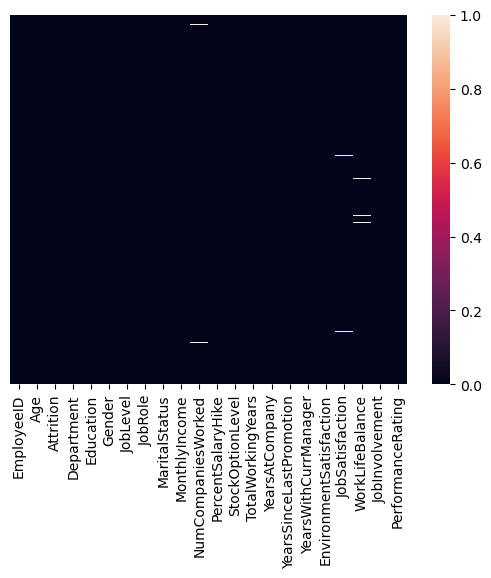

In [13]:
sns.heatmap(data.isnull(),yticklabels=False)

In [14]:
data['NumCompaniesWorked']=data['NumCompaniesWorked'].fillna(data['NumCompaniesWorked'].mode()[0])
data['EnvironmentSatisfaction'].ffill(axis=0,inplace=True)
data['JobSatisfaction'].bfill(axis=0,inplace=True)
data['WorkLifeBalance']=data['WorkLifeBalance'].fillna(data['WorkLifeBalance'].mode()[0])
data['TotalWorkingYears'].ffill(axis=0,inplace=True)

<Axes: >

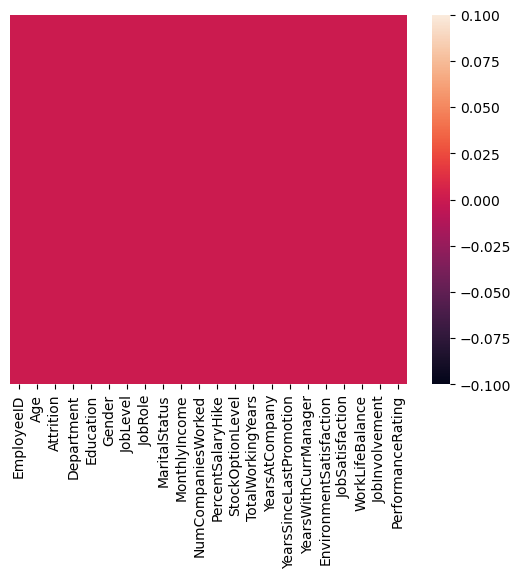

In [15]:
sns.heatmap(data.isnull(),yticklabels=False)

<Axes: xlabel='Age', ylabel='JobRole'>

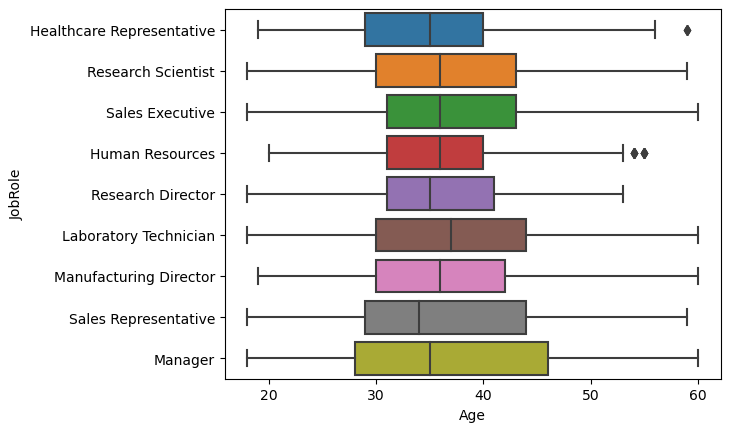

In [16]:
sns.boxplot(x='Age',y='JobRole',data=data)

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

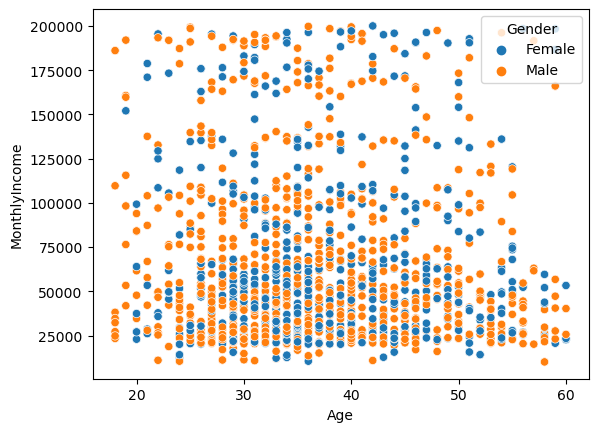

In [17]:
sns.scatterplot(x='Age',y='MonthlyIncome',data=data,hue='Gender')

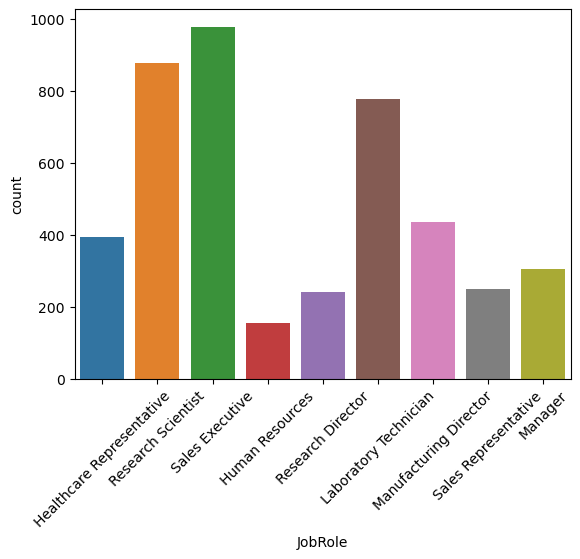

In [18]:
sns.countplot(x='JobRole',data=data)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='PerformanceRating', ylabel='count'>

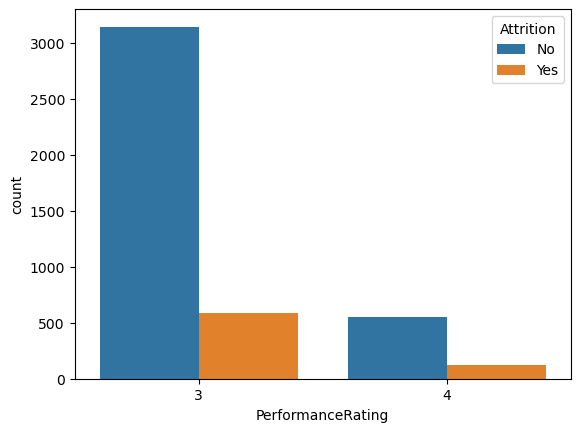

In [19]:
sns.countplot(data=data,x='PerformanceRating',hue='Attrition')

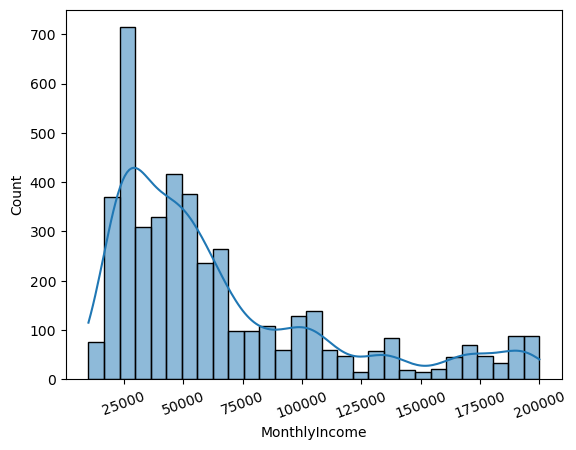

In [20]:
sns.histplot(data.MonthlyIncome,kde=True)
plt.xticks(rotation=20)
plt.show()

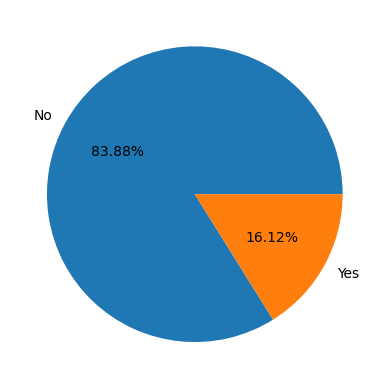

In [21]:
plt.pie(data['Attrition'].value_counts(),labels=data['Attrition'].unique(),autopct='%.2f%%')
plt.show()

<Axes: xlabel='Attrition', ylabel='YearsAtCompany'>

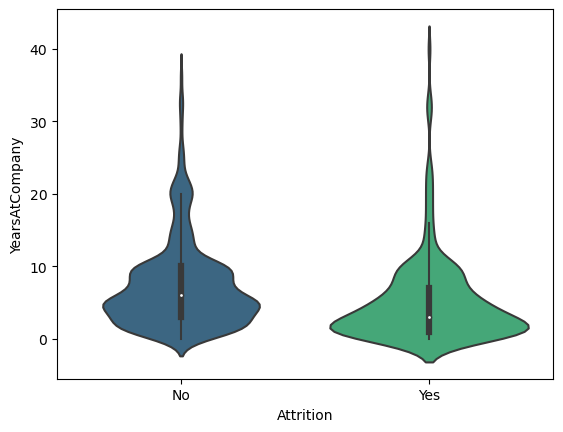

In [22]:
sns.violinplot(x='Attrition',y='YearsAtCompany',data=data,palette='viridis')

<Axes: xlabel='PercentSalaryHike', ylabel='YearsAtCompany'>

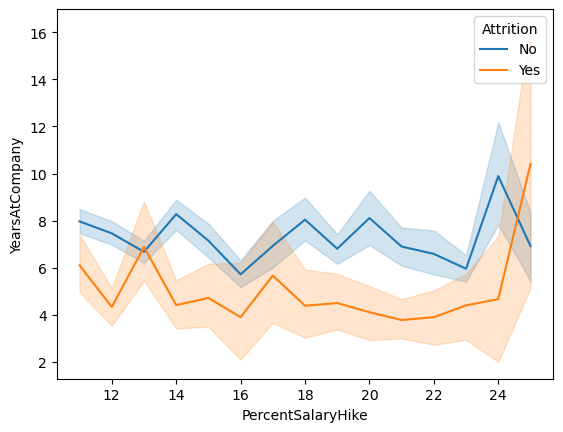

In [23]:
sns.lineplot(x='PercentSalaryHike',y='YearsAtCompany',data=data,hue='Attrition')

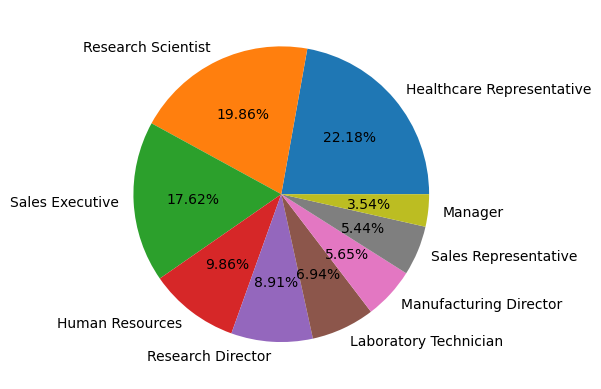

In [24]:
plt.pie(data['JobRole'].value_counts(),labels=data['JobRole'].unique(),autopct='%.2f%%')
plt.show()

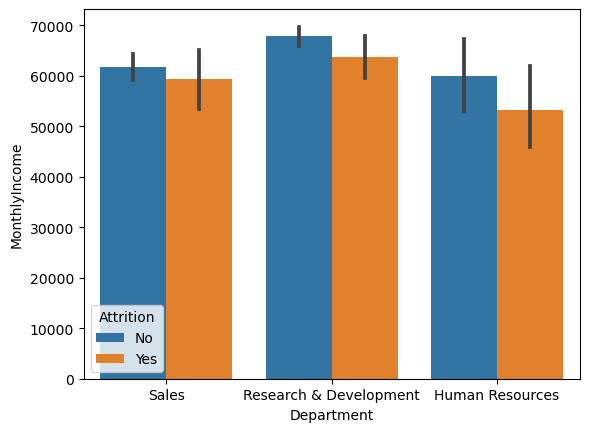

In [25]:
sns.barplot(x='Department',y='MonthlyIncome',data=data,hue='Attrition');

In [26]:
data.isna().sum()

EmployeeID                 0
Age                        0
Attrition                  0
Department                 0
Education                  0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [27]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
categorical_cols=['Department','Gender','JobRole','MaritalStatus']
encoder=OneHotEncoder(drop='first',sparse=False)
encoder_cols=pd.DataFrame(encoder.fit_transform(data[categorical_cols]),columns=encoder.get_feature_names_out(categorical_cols))
numerical_cols=['EmployeeID','Age','Education','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','JobInvolvement','PerformanceRating']
scaler=StandardScaler()
scaled_cols=pd.DataFrame(encoder.fit_transform(data[numerical_cols]),columns=encoder.get_feature_names_out(numerical_cols))

C:\Users\nikit\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\nikit\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
X=scaled_cols
Y=data['Attrition']

In [29]:
X

,EmployeeID_2,EmployeeID_3,EmployeeID_4,EmployeeID_5,EmployeeID_6,EmployeeID_7,EmployeeID_8,EmployeeID_9,EmployeeID_10,EmployeeID_11,...,JobSatisfaction_2.0,JobSatisfaction_3.0,JobSatisfaction_4.0,WorkLifeBalance_2.0,WorkLifeBalance_3.0,WorkLifeBalance_4.0,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,PerformanceRating_4
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [30]:
Y

0        No
1       Yes
2        No
3        No
4        No
       ... 
4405     No
4406     No
4407     No
4408     No
4409     No
Name: Attrition, Length: 4410, dtype: object

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=56)

SVM by Linear method# SVM by Linear method

In [32]:
model=SVC(kernel='linear')

In [33]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [34]:
y_pred=model.predict(X_test)

In [35]:
acc=accuracy_score(Y_test,y_pred)
print ('Accuracy:', acc)

Accuracy: 0.9773242630385488


In [36]:
print (classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

          No       0.99      0.99      0.99       737
         Yes       0.94      0.92      0.93       145

    accuracy                           0.98       882
   macro avg       0.96      0.96      0.96       882
weighted avg       0.98      0.98      0.98       882



Confusion Matrix
[[728   9]
 [ 11 134]]


<Axes: >

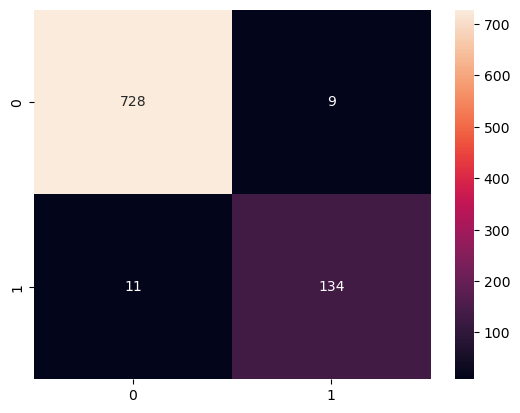

In [37]:
cm=confusion_matrix(Y_test,y_pred)
print ('Confusion Matrix')
print (cm)
sns.heatmap(data=cm,annot=True,fmt='.3g')

SVM by RBF method

In [38]:
model=SVC(kernel='rbf')
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(Y_test,y_pred)

In [39]:
print ('Accuracy:', acc)

Accuracy: 0.909297052154195


In [40]:
print (classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

          No       0.91      0.99      0.95       737
         Yes       0.93      0.48      0.64       145

    accuracy                           0.91       882
   macro avg       0.92      0.74      0.79       882
weighted avg       0.91      0.91      0.90       882



Confusion Matrix
[[732   5]
 [ 75  70]]


<Axes: >

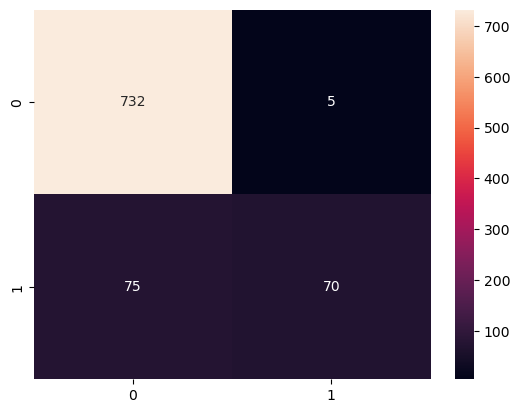

In [41]:
cm=confusion_matrix(Y_test,y_pred)
print ('Confusion Matrix')
print (cm)
sns.heatmap(data=cm,annot=True,fmt='.3g')

In [42]:
data.replace({'Attrition':{'No':0,'Yes':1}})

,EmployeeID,Age,Attrition,Department,Education,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,...,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,0,Sales,2,Female,1,Healthcare Representative,Married,131160,...,0,1.0,1,0,0,3.0,4.0,2.0,3,3
1,2,31,1,Research & Development,1,Female,1,Research Scientist,Single,41890,...,1,6.0,5,1,4,3.0,2.0,4.0,2,4
2,3,32,0,Research & Development,4,Male,4,Sales Executive,Married,193280,...,3,5.0,5,0,3,2.0,2.0,1.0,3,3
3,4,38,0,Research & Development,5,Male,3,Human Resources,Married,83210,...,3,13.0,8,7,5,4.0,4.0,3.0,2,3
4,5,32,0,Research & Development,1,Male,1,Sales Executive,Single,23420,...,2,9.0,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,0,Research & Development,4,Female,1,Research Scientist,Single,60290,...,1,10.0,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,0,Research & Development,4,Male,1,Laboratory Technician,Divorced,26790,...,0,10.0,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,0,Research & Development,2,Male,2,Sales Executive,Married,37020,...,0,5.0,4,1,2,1.0,3.0,3.0,3,4
4408,4409,42,0,Sales,2,Male,1,Laboratory Technician,Divorced,23980,...,1,10.0,9,7,8,4.0,1.0,3.0,2,3


Tuning for SVM by GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10],
'kernel': ['linear'],
'gamma': [1,0.1,0.01]}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X,Y)
best_estimator=grid_search.best_estimator_
# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [44]:
y_pred=best_estimator.predict(X_test)

In [45]:
acc=accuracy_score(Y_test,y_pred)
print ('Accuracy:',acc)

Accuracy: 0.9988662131519275


In [46]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       737
         Yes       1.00      0.99      1.00       145

    accuracy                           1.00       882
   macro avg       1.00      1.00      1.00       882
weighted avg       1.00      1.00      1.00       882



Confusion Matrix
[[737   0]
 [  1 144]]


<Axes: >

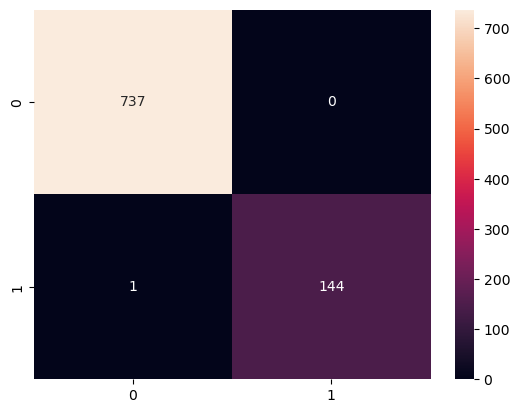

In [47]:
cm=confusion_matrix(Y_test,y_pred)
print ('Confusion Matrix')
print (cm)
sns.heatmap(data=cm,annot=True,fmt='.3g')

Tuning for SVM by RandomizedSearchCV

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [49]:
param_grid = {'C': [0.1, 1, 10],
'kernel': ['linear'],
'gamma': [1,0.1,0.01]}
svmc = SVC()
random_search = RandomizedSearchCV(svmc, param_distributions=param_grid,n_iter=10, cv=10)
random_search.fit(X,Y)
# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters:", random_search.best_params_)
best_estimators=grid_search.best_estimator_

C:\Users\nikit\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters: {'kernel': 'linear', 'gamma': 1, 'C': 1}


In [50]:
y_pred=best_estimators.predict(X_test)

In [51]:
acc=accuracy_score(Y_test,y_pred)
print ('Accuracy:',acc)

Accuracy: 0.9988662131519275


In [52]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       737
         Yes       1.00      0.99      1.00       145

    accuracy                           1.00       882
   macro avg       1.00      1.00      1.00       882
weighted avg       1.00      1.00      1.00       882



Confusion Matrix
[[737   0]
 [  1 144]]


<Axes: >

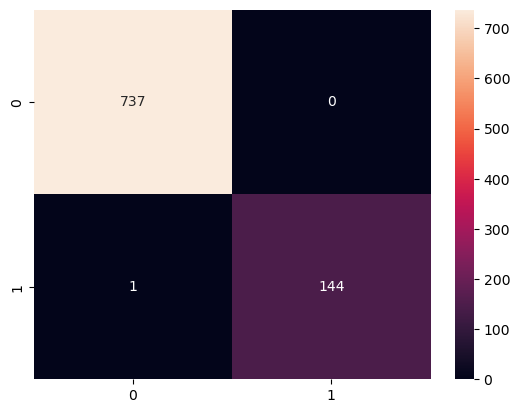

In [53]:
cm=confusion_matrix(Y_test,y_pred)
print ('Confusion Matrix')
print (cm)
sns.heatmap(data=cm,annot=True,fmt='.3g')

Gaussian Naive Bayes

In [54]:
GNB=naive_bayes.GaussianNB()
GNB.fit(X_train,Y_train)

GaussianNB()

# GaussianNB()

In [55]:
y_pred=GNB.predict(X_test)

In [56]:
acc=accuracy_score(Y_test,y_pred)
print ('Accuracy:',acc)

Accuracy: 0.9614512471655329


In [57]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

          No       1.00      0.95      0.98       737
         Yes       0.81      1.00      0.90       145

    accuracy                           0.96       882
   macro avg       0.91      0.98      0.94       882
weighted avg       0.97      0.96      0.96       882



Multinomial Naive Bayes

In [58]:
from sklearn import model_selection, naive_bayes, metrics,feature_extraction

In [59]:
x=scaled_cols

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2,random_state=56)

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [62]:
bayes = naive_bayes.MultinomialNB()

In [63]:
bayes.fit(x_train,y_train)

MultinomialNB()

In [64]:
y_pred_nb=bayes.predict(x_test)
accuracy=metrics.accuracy_score(y_test,y_pred_nb)
accuracy

0.8526077097505669

In [65]:
print(metrics.classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

          No       0.85      0.99      0.92       737
         Yes       0.80      0.14      0.24       145

    accuracy                           0.85       882
   macro avg       0.83      0.57      0.58       882
weighted avg       0.85      0.85      0.81       882



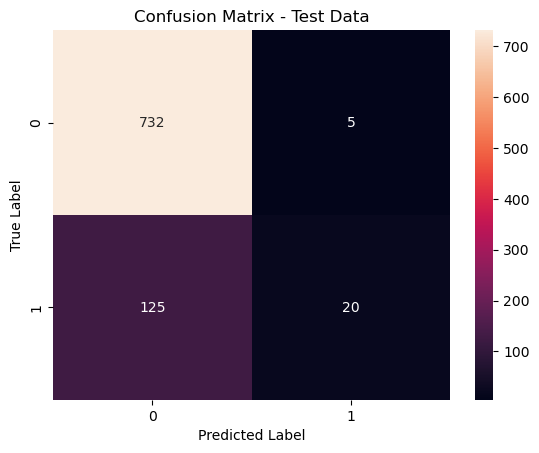

In [66]:
cm=confusion_matrix(y_test,y_pred_nb)
cm
plt.figure()
sns.heatmap(cm, annot=True, fmt='.3g')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Bernoulli Naive Bayes

In [67]:
bayesBNB= naive_bayes.BernoulliNB()

In [68]:
bayesBNB.fit(x_train,y_train)

BernoulliNB()

In [69]:
y_pred_bnb=bayesBNB.predict(x_test)
accuracy=metrics.accuracy_score(y_test,y_pred_bnb)
accuracy

0.8401360544217688

In [70]:
print(metrics.classification_report(y_test, y_pred_bnb))

              precision    recall  f1-score   support

          No       0.84      1.00      0.91       737
         Yes       1.00      0.03      0.05       145

    accuracy                           0.84       882
   macro avg       0.92      0.51      0.48       882
weighted avg       0.87      0.84      0.77       882



Tuning for Naive Bayes

In [71]:
param_grid = {'alpha': [0.1, 1, 10, 100],
'fit_prior': [True, False]}
bayes = naive_bayes.MultinomialNB()
grid_search = GridSearchCV(bayes, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'fit_prior': [True, False]})

In [73]:
best_param = grid_search.best_params_
best_nb = naive_bayes.MultinomialNB(alpha = best_param['alpha'], fit_prior =best_param['fit_prior'])
best_nb.fit(x_train, y_train)
y_pred = best_nb.predict(x_test)

In [74]:
print("Best Hyperparameter : ", best_param)

Best Hyperparameter :  {'alpha': 0.1, 'fit_prior': True}


In [75]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy',acc)

Accuracy 0.9433106575963719


In [76]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.99      0.94      0.97       737
         Yes       0.76      0.96      0.85       145

    accuracy                           0.94       882
   macro avg       0.88      0.95      0.91       882
weighted avg       0.95      0.94      0.95       882



<Axes: >

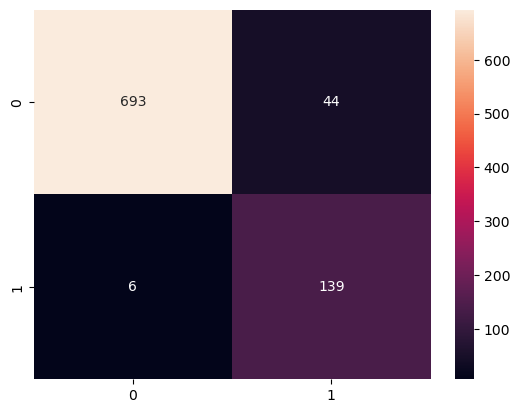

In [77]:
cm=confusion_matrix(y_test,y_pred)
cm
plt.figure()
sns.heatmap(cm, annot=True, fmt='.3g')